## Exercici 1
Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.

**BeautifulSoup**

In [193]:
import requests

URL = "https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000&punto=indice"
page = requests.get(URL)

print(page.text)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-idioma="esp" data-hora-act="Tue, 29 Mar 2022 19:33:25 GMT" data-app-path="/" data-bolsa="BMadrid" data-analytics-id="UA-35966870-2"><meta http-equiv="X-UA-Compatible" content="IE=11" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta id="ctl00_copyright" name="copyright" content="Copyright © BME 2022" /><title>
	Bolsa de Madrid - Precios Sesión
</title><link id="ctl00_RSSLink1" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Todo" title="Bolsa de Madrid: Todos los contenidos agregados" /><link id="ctl00_RSSLink2" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" title="Bolsa de Madrid: Notas de Prensa" /><link id="ctl00_RSSLink3" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" 

In [194]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000&punto=indice"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

In [195]:
empresas = soup.find_all("td", class_="DifFlBj")
difs = soup.find_all("td", class_="DifClBj")

empresas_bj = []
for empresa in empresas:
    empresas_bj.append(empresa.text.strip())

print(len(empresas_bj), empresas_bj)

difs_bj = []
for dif in difs:
    difs_bj.append(dif.text.strip())
    
print(len(difs_bj), difs_bj)

9 ['ACCIONA', 'ALMIRALL', 'ARCELORMIT.', 'ENAGAS', 'NATURGY', 'R.E.C.', 'REPSOL', 'ROVI', 'SOLARIA']
10 ['-1,14', '-0,64', '-5,62', '-1,38', '-2,51', '-0,86', '-0,19', '-1,11', '-0,88', '-8,82']


In [196]:
empresas = soup.find_all("td", class_="DifFlSb")
difs = soup.find_all("td", class_="DifClSb")

empresas_sb = []
for empresa in empresas:
    empresas_sb.append(empresa.text.strip())

print(len(empresas_sb), empresas_sb)

difs_sb = []
for dif in difs:
    difs_sb.append(dif.text.strip())
    
print(len(difs_sb), difs_sb)

27 ['IBEX 35®', 'ACERINOX', 'ACS', 'AENA', 'AMADEUS', 'B.SANTANDER', 'BA.SABADELL', 'BANKINTER', 'BBVA', 'CAIXABANK', 'CELLNEX', 'CIE AUTOMOT.', 'ENDESA', 'FERROVIAL', 'FLUIDRA', 'GRIFOLS CL.A', 'IAG', 'IBERDROLA', 'INDITEX', 'INDRA A', 'INM.COLONIAL', 'MAPFRE', 'MELIA HOTELS', 'MERLIN', 'PHARMA MAR', 'SIEMENS GAME', 'TELEFONICA']
27 ['2,98', '1,73', '0,93', '2,18', '7,28', '5,47', '7,02', '6,78', '6,71', '4,56', '0,99', '7,10', '1,19', '1,70', '4,91', '1,99', '5,65', '2,36', '3,70', '2,51', '0,12', '2,12', '5,24', '0,33', '0,18', '1,64', '0,97']


In [197]:
# Averiguar si el IBEX ha subido o ha bajado
if "IBEX 35®" in empresas_sb:
    print(empresas_sb)
    index = empresas_sb.index("IBEX 35®")
    del empresas_sb[index]
    print(empresas_sb)
elif "IBEX 35®" in empresas_bj:
    print(empresas_bj)
    index = empresas_bj.index("IBEX 35®")
    del empresas_sb[index]
    print(empresas_bj)

['IBEX 35®', 'ACERINOX', 'ACS', 'AENA', 'AMADEUS', 'B.SANTANDER', 'BA.SABADELL', 'BANKINTER', 'BBVA', 'CAIXABANK', 'CELLNEX', 'CIE AUTOMOT.', 'ENDESA', 'FERROVIAL', 'FLUIDRA', 'GRIFOLS CL.A', 'IAG', 'IBERDROLA', 'INDITEX', 'INDRA A', 'INM.COLONIAL', 'MAPFRE', 'MELIA HOTELS', 'MERLIN', 'PHARMA MAR', 'SIEMENS GAME', 'TELEFONICA']
['ACERINOX', 'ACS', 'AENA', 'AMADEUS', 'B.SANTANDER', 'BA.SABADELL', 'BANKINTER', 'BBVA', 'CAIXABANK', 'CELLNEX', 'CIE AUTOMOT.', 'ENDESA', 'FERROVIAL', 'FLUIDRA', 'GRIFOLS CL.A', 'IAG', 'IBERDROLA', 'INDITEX', 'INDRA A', 'INM.COLONIAL', 'MAPFRE', 'MELIA HOTELS', 'MERLIN', 'PHARMA MAR', 'SIEMENS GAME', 'TELEFONICA']


In [198]:
if len(empresas_sb) < len(difs_sb):
    del difs_sb[0]
    
print(len(empresas_sb), len(difs_sb))

26 26


In [199]:
if len(empresas_bj) < len(difs_bj):
    del difs_bj[0]
    
print(len(empresas_bj), len(difs_bj))

9 9


In [206]:
import pandas as pd

cambios_ibex = pd.DataFrame()

cambios_ibex["Empresa"] = empresas_bj + empresas_sb
cambios_ibex["Dif"] = difs_bj + difs_sb
cambios_ibex = cambios_ibex.sort_values(by=['Empresa'])

display(cambios_ibex)

,Empresa,Dif
0,ACCIONA,"-0,64"
9,ACERINOX,"1,73"
10,ACS,"0,93"
11,AENA,"2,18"
1,ALMIRALL,"-5,62"
12,AMADEUS,"7,28"
2,ARCELORMIT.,"-1,38"
13,B.SANTANDER,"5,47"
14,BA.SABADELL,"7,02"
15,BANKINTER,"6,78"


In [207]:
cambios_ibex['Dif'] = cambios_ibex['Dif'].str.replace(',','.')
cambios_ibex['Dif'] = pd.to_numeric(cambios_ibex['Dif'])
cambios_ibex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Empresa  35 non-null     object 
 1   Dif      35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 840.0+ bytes


<AxesSubplot:xlabel='Dif', ylabel='Empresa'>

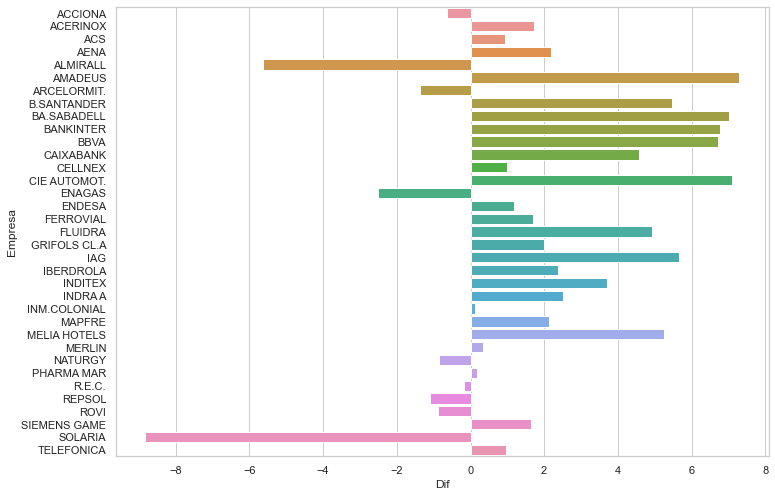

In [208]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
seaborn.barplot(x="Dif", y="Empresa", data=cambios_ibex)

**Selenium**